In [174]:
import os
import matplotlib.pyplot as plt
import pims
# import pims.BioformatsReader
import sys
import numpy as np
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import cellpose_mask,cellpose_model
import pandas as pd
from nd2reader import ND2Reader
import glob
import csv
plot = True

import contextlib
import io
from cellpose import io as iocp
from cellpose import plot,utils

sys.path.insert(0,'/home/jmamede/scripts/LivePanelize')
from libraries import initialize_reader,_read_frame,time_stack

In [175]:
# ficheiro = "/run/media/jmamede/Joao/96wells/20201119_143803_601/WellA01_ChannelGFP,DAPI_Seq0000.nd2"
dirname = "/run/media/jmamede/Joao/tet/20201208tet/*PRJ.ome.tiff"

filelist = glob.glob(dirname)
filelist.sort()

# metadata = frames.metadata

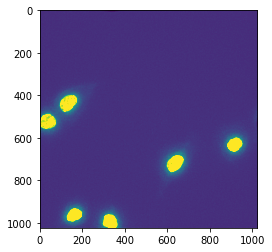

In [176]:
ficheiro = filelist[21]
reader = pims.open(ficheiro)
# print(reader.sizes)

reader.bundle_axes = 'yx'
reader.iter_axes = 'c'
plt.imshow(reader[2],vmin=np.min(reader[2]),vmax=np.median(reader[2])*7)
ficheiro

# test = dask.array.concatenate(
#     [time_stack(ficheiro,bundler='cyx') for filename in filelist[]]
# , axis=2)
reader =  time_stack(ficheiro,bundler='cyx')
reader = reader.reshape(1,183,1024,1024)
#Shaped into Time, Color, Y, X
reader = reader.reshape(61,3,1024,1024)


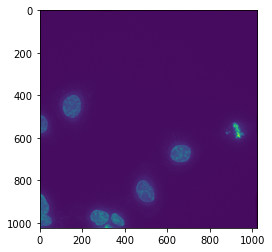

In [178]:
plt.imshow(reader[55,2])



In [179]:
# reader = ND2Reader(ficheiro)
# print(reader.sizes)

# metadata = reader.metadata
# reader.bundle_axes = 'cyx'
# reader.iter_axes = 'z'
# #there is a bug, it reads each visit point as a Z.
# reader.default_coords['v'] = 0
# #reader.sizes['z']

def plots(reader,cells_masks,nuclei_masks,base):
    from cellpose.utils import masks_to_outlines
    %matplotlib inline
    f, axarr = plt.subplots(2,2)
    print(axarr.shape)
    

    axarr[0,0].imshow(reader[0],vmin=np.min(reader[0]),vmax=np.max(reader[0])
        ,cmap="gray"
                     )
    axarr[0,0].imshow(masks_to_outlines(cells_masks),alpha=0.4,cmap='jet')
    axarr[0,1].imshow(cells_masks
                      #,alpha=0.6
        )
#     axarr[0,2].imshow(reader[i][0],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[0,2].imshow(cells_masks,alpha=0.6
#         )
    axarr[1,0].imshow(reader[2],vmin=np.min(reader[2]),vmax=np.median(reader[2]*3)
                      ,cmap="gray"
        )
    axarr[1,0].imshow(masks_to_outlines(nuclei_masks),alpha=0.4,cmap='jet')
    axarr[1,1].imshow(nuclei_masks
                      #,alpha=0.6
        )
#     axarr[1,2].imshow(reader[i][1],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[1,2].imshow(nuclei_masks
# #                 ,alpha=0.6
#         )
    plt.savefig(base+".png",dpi=600)
#     plt.show()
    return f,axarr

In [180]:

    
model = cellpose_model(GPU=True)
model_nuc = cellpose_model(GPU=True,model_type='nuclei')

base = os.path.splitext(ficheiro)[0]

f = open(base+"csv", 'wt')
output = csv.writer(f
#                     , delimiter=',',
#                             quotechar='"', quoting=csv.QUOTE_MINIMAL
                   )
output.writerow(["FileName","num_cells","infected_cells","percentage"])

** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off
** CUDA version installed and working. **
>>>> using GPU
cellpose_residual_on_style_on_concatenation_off


46

In [181]:
reader.shape

(61, 3, 1024, 1024)

In [182]:
cellpose_mask(reader[0,0],model
    #                             ,size=2500
                            ,flow_threshold=0.4,size=0,diam=300,cell_prob=0
                           )

processing 1 image(s)
time spent: running network 0.62s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.69 sec
>>>> TOTAL TIME 0.69 sec


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [183]:
cells_masks = np.zeros((reader.shape[0],reader.shape[2],reader.shape[3]))
nuclei_masks = np.copy(cells_masks)
cells_masks.shape

(61, 1024, 1024)

In [189]:
for time in range(reader.shape[0]):

    cells_masks[time,:,:] = cellpose_mask(reader[time,0,:,:],model
    #                             ,size=2500
                            ,flow_threshold=0.4,size=0,diam=300,cell_prob=0
                           )
    nuclei_masks[time,:,:] = cellpose_mask(reader[time,2,:,:],model_nuc
    #                             ,size=2500
                            ,flow_threshold=1.8,size=0,diam=70,cell_prob=0
                           )

processing 1 image(s)
time spent: running network 0.56s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.63 sec
>>>> TOTAL TIME 0.63 sec
processing 1 image(s)
time spent: running network 0.54s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.07
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
esti

/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.52s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.52s; flow+mask computation 0.06
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.53s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.54 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.61 sec
>>>> TOTAL TIME 0.61 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.60s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.64 sec
>>>> TOTAL TIME 0.64 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.54s; flow+mask computation 0.01
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.59s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.65 sec
>>>> TOTAL TIME 0.65 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.66s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.72 sec
>>>> TOTAL TIME 0.72 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.58s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.62 sec
>>>> TOTAL TIME 0.63 sec
processing 1 image(s)
time spent: running network 0.64s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.70 sec
>>>> TOTAL TIME 0.70 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.63s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.67 sec
>>>> TOTAL TIME 0.67 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.61s; flow+mask computation 0.07
estimated masks for 1 image(s) in 0.69 sec
>>>> TOTAL TIME 0.69 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.55s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.61 sec
>>>> TOTAL TIME 0.61 sec
processing 1 image(s)
time spent: running network 0.52s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.53s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.06
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.54 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.51s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.54 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.54s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)
time spent: running network 0.54s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.60 sec
>>>> TOTAL TIME 0.60 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.55s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)
time spent: running network 0.54s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.55s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.55s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.61 sec
>>>> TOTAL TIME 0.61 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.54s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)
time spent: running network 0.54s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.52s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.60 sec
>>>> TOTAL TIME 0.60 sec
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.05
estimated masks for 1 imag

/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.54s; flow+mask computation 0.01
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.59 sec
>>>> TOTAL TIME 0.59 sec
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.60 sec
>>>> TOTAL TIME 0.60 sec
processing 1 image(s)
time spent: running network 0.53s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.55s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.62 sec
>>>> TOTAL TIME 0.62 sec
processing 1 image(s)
time spent: running network 0.52s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 imag

/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.51s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.54 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.63s; flow+mask computation 0.06
estimated masks for 1 image(s) in 0.71 sec
>>>> TOTAL TIME 0.71 sec
processing 1 image(s)
time spent: running network 0.52s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.52s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.01
estimated masks for 1 image(s) in 0.52 sec
>>>> TOTAL TIME 0.52 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.06
estimated masks for 1 imag

/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.01
estimated masks for 1 image(s) in 0.52 sec
>>>> TOTAL TIME 0.52 sec
processing 1 image(s)


/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.53 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.07
estimated masks for 1 image(s) in 0.58 sec
>>>> TOTAL TIME 0.58 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.57 sec
>>>> TOTAL TIME 0.57 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.05
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 imag

/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jmamede/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


time spent: running network 0.50s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.54 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.04
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.50s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.54 sec
>>>> TOTAL TIME 0.54 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.02
estimated masks for 1 image(s) in 0.53 sec
>>>> TOTAL TIME 0.53 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.55 sec
>>>> TOTAL TIME 0.55 sec
processing 1 image(s)
time spent: running network 0.52s; flow+mask computation 0.03
estimated masks for 1 image(s) in 0.56 sec
>>>> TOTAL TIME 0.56 sec
processing 1 image(s)
time spent: running network 0.51s; flow+mask computation 0.03
estimated masks for 1 imag

In [186]:
%gui qt
import napari

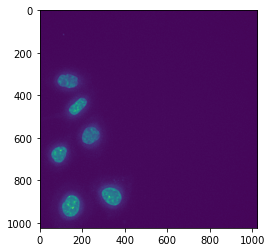

In [168]:

blue = reader[:,2,:,:].compute()
# blue[0].compute()
plt.imshow(blue[55])

In [190]:
v = napari.Viewer(show=False)
v.show()
v.add_image(
    reader[:,2,:,:],
    blending='additive',
#     contrast_limits=[np.min(reader[0,:,:]),np.max(reader[0,:,:])],
#         ndisplay=2,
    colormap='blue',
    name='nuclei'
)

v.add_image(
    reader[:,0,:,:],
    blending='additive',
#     contrast_limits=[np.min(reader[0,:,:]),np.max(reader[0,:,:])],
#         ndisplay=2,
    colormap='green',
    name='HIV-iGFP'
)

v.add_image(
    reader[:,1,:,:],
    blending='additive',
#     contrast_limits=[np.min(reader[0,:,:]),np.max(reader[0,:,:])],
#         ndisplay=2,
    colormap='green',
    name='IN-mRuby3'
)

<Image layer 'HIV-iGFP' at 0x7f5f201fbe50>

In [188]:
v.add_labels(
    nuclei_masks,
    #     utils.outlines_list(result[0]),
    opacity=0.4,
    blending='additive',
    #         contrast_limits=[np.min(result[1]),np.max(result[1])],
    name='Nuclei'
)
v.add_labels(
    cells_masks,
    opacity=0.4,
    blending='additive',
    #             contrast_limits=[np.min(result[2]),np.max(result[2])],
    name='Cells'
) 



NameError: name 'result' is not defined

In [155]:
v.add_labels(
    nuclei_masks,
    #     utils.outlines_list(result[0]),
    opacity=0.4,
    blending='additive',
    #         contrast_limits=[np.min(result[1]),np.max(result[1])],
    name='Nuclei'
)
v.add_labels(
    result[2],
    opacity=0.4,
    blending='additive',
    #             contrast_limits=[np.min(result[2]),np.max(result[2])],
    name='Cells'
) 

AssertionError: 

/run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v10_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v10_PRJ.ome Number of Nuclei: 8 Number of positive cells: 1 Percentage: 0.125
/run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v11_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v11_PRJ.ome Number of Nuclei: 4 Number of positive cells: 0 Percentage: 0.0
/run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v12_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v12_PRJ.ome Number of Nuclei: 6 Number of positive cells: 0 Percentage: 0.0
/run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4cl1h_pump_v13_PRJ.ome.tiff Image#: /run/media/jmamede/Joao/tet/20201208tet/D11_24NtetPSPAXopti05_vit_rutin_nh4

KeyboardInterrupt: 

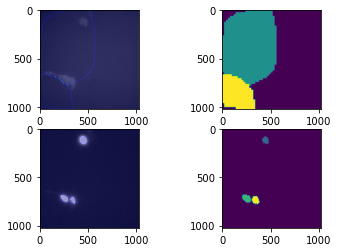

In [19]:
for ficheiro in filelist:
    reader = pims.open(ficheiro)
    base = os.path.splitext(ficheiro)[0]
    reader.bundle_axes = 'yx'
    reader.iter_axes = 'c'
    with contextlib.redirect_stdout(io.StringIO()):

        cells_masks = cellpose_mask(reader[0],model
        #                             ,size=2500
                                    ,flow_threshold=0.8,size=0,diam=300,cell_prob=-2
                                   )
        nuclei_masks = cellpose_mask(reader[2],model_nuc
        #                             ,size=2500
                                    ,flow_threshold=1.8,size=0,diam=70,cell_prob=-2
                                   )

        outlines = utils.outlines_list(cells_masks)
        iocp.outlines_to_text(base, outlines)

        fig,axarr =  plots(reader,cells_masks,nuclei_masks,base)

    text = "Image#: {0} Number of Nuclei: {1} Number of positive cells: {2} Percentage: {3}".format(base,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max())
    print(ficheiro,text)
    output.writerow([ficheiro,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max()*100])
f.close()

In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)